# 第8回 回帰分析


[![open in colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/slt666666/biostatistics_text_wed/blob/main/source/_static/colab_notebook/chapter7.ipynb)

※Web上ではテーブルや記号など一部LaTeXが反映されず見にくくなってしまっていますが、Google Colabだとちゃんと見えます。

## はじめに

統計的な手法の中で、もっともよく使用されている手法の中に回帰分析があります。

回帰分析は非常に使いやすく、直感的に理解しやすい手法でもあるため、多くの方が既に使用した経験もあるのではないでしょうか。

回帰分析についてもこれまで扱ってきた推定や検定が使用されており、またRを用いることで簡単に分析を実施できる。

本項では、回帰分析や重回帰分析について扱います。

まずは二つの変数の関連性の強さを示す**相関**について触れ、その後**回帰**について学びます。

# 相関

序盤の記述統計学のところで扱いましたが、

2つの変数$x, y$のデータが$(x_1, y_1), (x_2, y_2), \cdots, (x_n, y_n)$で与えられたとき、変数$x$と変数$y$の間の相関係数$r_{xy}$は

$r_{xy}=\frac{\sum (x_i-\bar{x})(y_i-\bar{y})/n}{\sqrt{\sum (x_i-\bar{x})^2/n}\sqrt{\sum (y_i-\bar{y})^2/n}}=\frac{\sum (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum (x_i-\bar{x})^2}\sqrt{\sum (y_i-\bar{y})^2}}$

で定義されます。

ただ、相関係数は$x, y$がともに正規分布に従っているという前提が必要な値になります。

例えばある植物の草丈$(X)$と収穫量$(Y)$を測定して、以下の観測値が得られたとすると、

\begin{array}{ccccc}  \hline
 個体 & x & y \\ \hline
 1 & 75 & 158 \\
 2 & 67 & 149 \\
 3 & 65 & 143 \\
 4 & 71 & 153 \\
 5 & 72 & 147 \\ \hline
\end{array}

$X$と$Y$の相関係数はRの`cor`関数で計算できます。

[1] 0.815989

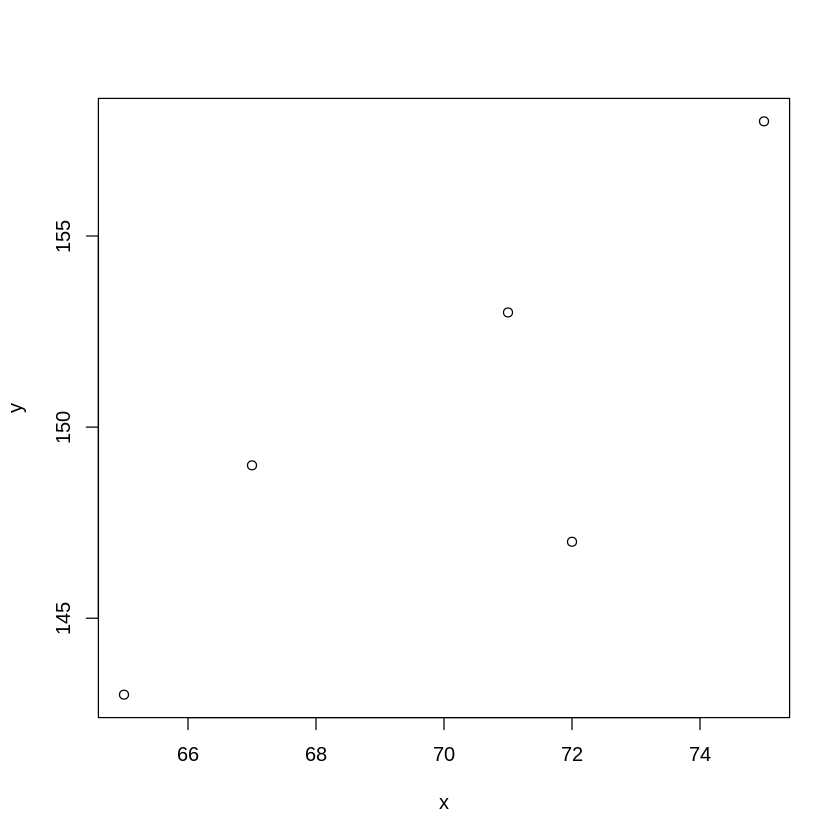

In [ ]:
# x, y の相関係数をcor関数で求める
x <- c(75, 67, 65, 71, 72)
y <- c(158, 149, 143, 153, 147)

cor(x, y)

plot(x, y)

## 相関係数の検定

相関係数が高いほど2変数間の相関は強いということですが、この点に関しても検定が出来ます。

計算した相関係数$r$から、2変数が有意に相関関係にあるかどうかの検定です(あんまりやらないですが。)

母集団における相関係数$\rho$とすると、

帰無仮説$H_0:\rho=0$、対立仮説$H_1:\rho \ne 0$

この時、帰無仮説の下で、

$t=r\sqrt{\dfrac{n-2}{1-r^2}}$

が自由度$n-2$の$t$分布$t(n-2)$に従います。

この統計量をもとに帰無仮説を評価することになります。

今回の場合、$t=0.816\times \sqrt{\dfrac{5-2}{1-0.816^2}}=2.445$

と$t$値を計算できるので、自由度$n-2 = 3$の$t$分布に基づいて$t_{1-\alpha/2}(3)$を求めると、

In [ ]:
# qt関数でt分布のパーセント点を求める
qt(0.975, 3)

[1] 3.182446

ということで、$t < t_{0.05/2}$となり、帰無仮説は棄却されない。

つまり、$x,y$は有意水準5%の下では相関関係にあるとは言えない。という結果になります。

ただし、下記に書いた注意点もふまえて、数値として相関係数を検定することは殆どありません。

## 相関係数の注意点

相関係数$r$は$r \geqq 0.6$だと強い相関がある、等の指標として用いられます。

しかし、相関係数だけで変数間の関係性を判断するのは非常に危険です。

Jan Vanhoveさんという方の作成したRプログラムで、ある相関係数を示す様々なデータプロットの様子を示す事が出来ます。

下の`r=0.6`のところを色々変えると、相関係数がその数値になる場合のデータを何パターンも表示してくれます。

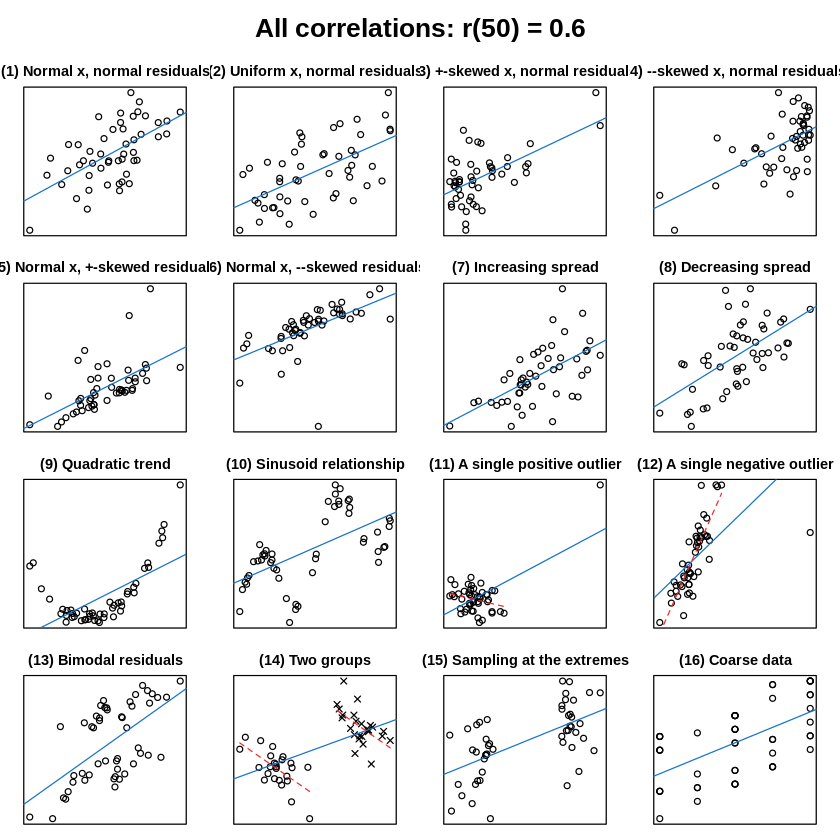

In [ ]:
# 相関係数のパターンをいくつか図示する
source("https://github.com/slt666666/biostatistics_text_wed/raw/refs/heads/main/source/_static/scripts/plot_r.R")
plot_r(r = 0.6, n = 50)

これを見ると、実際に散布図を作成してみないと、相関係数の高さとは関係なく、本当に$x,y$の間に意味のある相関があるかは分からないと理解できるかと思います。

このことからも、これまで様々な検定や統計量を扱ってきましたが、これらはあくまでもデータを表す統計値の1つでしかなく、**生データの可視化**が最も重要だと言えます。

# 回帰分析

続いて、2変数の関係性は、相関だけではなく**回帰**という手法を用いても表現できます。

\begin{array}{ccccc}  \hline
 個体 & x & y \\ \hline
 1 & 75 & 158 \\
 2 & 67 & 149 \\
 3 & 65 & 143 \\
 4 & 71 & 153 \\
 5 & 72 & 147 \\ \hline
\end{array}

この様に草丈$(X)$と収穫量$(Y)$のデータがあるときに、$X$と$Y$の説明の関係性を定量的なモデルである**回帰方程式**として表すことが回帰分析になります。

説明される変数$Y$は**従属変数**や**目的変数**、説明する変数$X$は**説明変数**と呼びます。

回帰分析は$Y$を$X$で**説明**しようとすることが重要であり、単純に$X, Y$の間に関係があるかどうかだけ調べる**相関**とは異なっています。

得られたデータから`ggplot`ライブラリの`geom_point`関数で散布図を描き、`geom_smooth(method="lm", se=FALSE)`関数で回帰直線を描いてみると

`geom_smooth()` using formula = 'y ~ x'


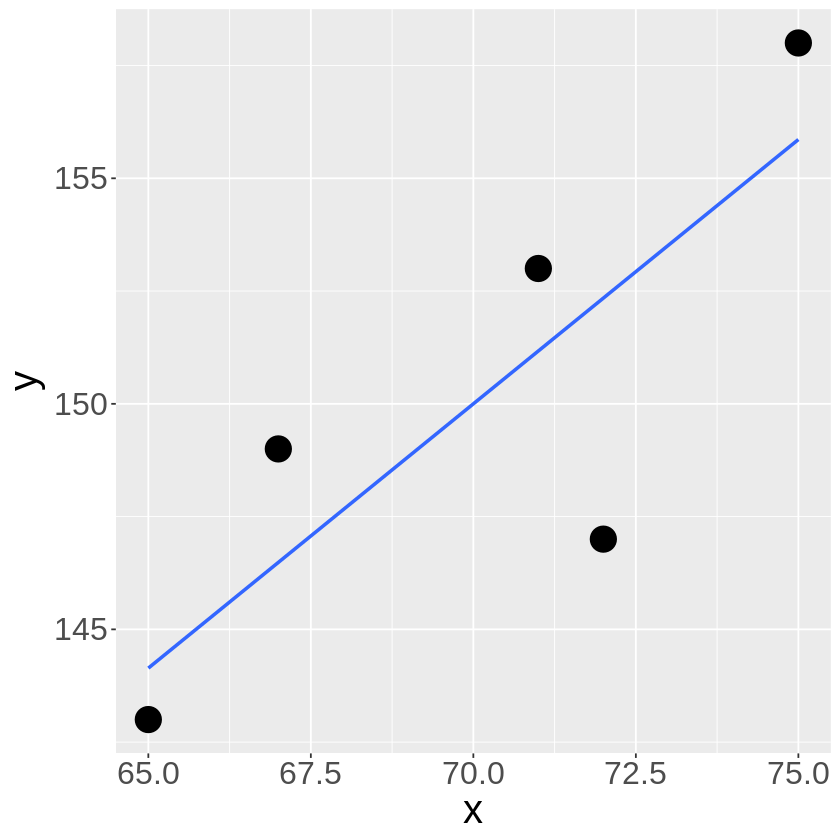

In [ ]:
# ggplotを使用して、回帰直線付きの散布図を描く
library(ggplot2)

x <- c(75, 67, 65, 71, 72)
y <- c(158, 149, 143, 153, 147)
data <- data.frame(x=x,y=y)

g <- ggplot(data, aes(x=x, y=y))
g <- g + geom_point(size=7)
g <- g + geom_smooth(method="lm",se=FALSE)
g <- g + theme(text = element_text(size = 24))
g

$X$(草丈)が伸びるに従って、$Y$収穫量も増加していそうな気がします。

草丈($X$)によって説明できる部分と、それ以外の部分(切片)に分けてこの関係性を表すと、

$y = \beta_1 + \beta_2x$

と表すことができ、これは$y$の$x$上への**回帰方程式**と呼ばれます。

今回の様に$y$が$x$の線形関数である場合、**線形回帰**と呼び、それ以外の場合は、**非線形回帰**と呼ぶ。

ここで、$i$番目の個体の収穫量を$Y_i$、草丈を$X_i$、偶然生じたばらつきの部分を$\epsilon_i$とすると、母集団における収穫量$Y$と草丈$X$の関係性は、

$Y_i = \beta_1+\beta_2X_i+\epsilon_i$　　$(i=1,2,...,n)$

と表せます。(このモデルは**母回帰方程式**と呼ばれます。)

この$\beta_1, \beta_2$を**偏回帰係数**と呼び、母集団の値なので通常は未知な値となります。

回帰分析では、この偏回帰係数について推定や検定を行うことになります。

また、$\epsilon_i$は**誤差項**と呼び、

* 期待値は0になる。$E(\epsilon_i) = 0$
* 分散は一定。$V(\epsilon_i) = \sigma^2$

となります。そのため、$i$番目の個体の$X$の値$X_i$に対して、$Y_i$の期待値は

$E(Y_i) = \beta_1+\beta_2X_i$

となることを意味しています。

↓誤差項のイメージ図

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter9/lm.png?raw=true" alt="title" height="250px">

## 回帰係数の推定

### **最小二乗法による回帰係数の推定**

$Y_i = \beta_1+\beta_2X_i+\epsilon_i$　　$(i=1,2,...,n)$

という回帰式において、$\beta_1, \beta_2$の推定を行います。

下図の様な回帰式があった場合、$X_i$によって説明できない誤差項は

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter8/lm.png?raw=true" alt="title" height="250px">

$\epsilon_i = Y_i - (\beta_1 + \beta_2X_i)$

となります。この$\epsilon$が出来るだけ小さくなる回帰式が適切な直線だと考えられます。

そこで、$\epsilon_i$の正負の符号を取り除いた和を、

$S = \sum\epsilon_i^2 = \sum \lbrace Y_i - (\beta_1 + \beta_2X_i) \rbrace^2$

とすると、$S$は$Y_i$が$\beta_1 + \beta_2X_i$で説明できない部分の総和を表しています。

この$S$を出来るだけ小さくする様に$\beta_1, \beta_2$の推定を行う方法の1つが**最小二乗法**になります。

推定される$\hat{\beta_1}, \hat{\beta_2}$を$\beta_1, \beta_2$の**最小二乗推定量**と呼びます。

$S$を最小にする$\hat{\beta_1}, \hat{\beta_2}$は偏微分により求める事が出来るので、

$\dfrac{\partial S}{\partial \beta_1} = -2\sum(Y_i-\beta_1-\beta_2X_i) = 0$

$\dfrac{\partial S}{\partial \beta_2} = -2\sum(Y_i-\beta_1-\beta_2X_i)X_i = 0$

を解くことで求まります。

この式を整理すると、

$n\beta_1 + (\sum X_i)\beta_2 = \sum Y_i,$

$(\sum X_i)\beta_1+(\sum X_i^2)\beta_2 = \sum X_i Y_i$

となり、これを解くと、$\hat{\beta_1}, \hat{\beta_2}$は

$\hat{\beta_2} = \dfrac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sum (X_i - \bar{X})^2}$

$\hat{\beta_1} = \bar{Y}-\hat{\beta_2}\bar{X}$

と計算できます。この$\hat{\beta_1}, \hat{\beta_2}$は**標本偏回帰係数**と呼びます。

この推定値により得られる$Y = \hat{\beta_1}+\hat{\beta_2}X$を**標本回帰方程式**と呼びます。




\begin{array}{ccccc}  \hline
 個体 & x & y \\ \hline
 1 & 75 & 158 \\
 2 & 67 & 149 \\
 3 & 65 & 143 \\
 4 & 71 & 153 \\
 5 & 72 & 147 \\ \hline
\end{array}

この草丈$(X)$と収穫量$(Y)$のデータから標本回帰方程式を求めてみると


$\hat{\beta_2} = \dfrac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sum (X_i - \bar{X})^2}$、$\hat{\beta_1} = \bar{Y}-\hat{\beta_2}\bar{X}$



In [ ]:
# βの値を求める
x <- c(75, 67, 65, 71, 72)
y <- c(158, 149, 143, 153, 147)

x_diff <- x - mean(x)
y_diff <- y - mean(y)

beta2 <- sum(x_diff * y_diff) / sum(x_diff^2)
beta1 <- mean(y) - beta2 * mean(x)

print(beta2)
print(beta1)

[1] 1.171875
[1] 67.96875


と計算されるので、$\hat{\beta_2}=1.171875, \hat{\beta_1}=67.96875$と求まります。

そのため、標本回帰方程式は $Y = 67.96875 + 1.171875X $ と表せます。

このとき、観測値$Y_i$と回帰方程式から得られる回帰値$\hat{Y_i}$との差である

$\hat{e_i} = Y_i - \hat{Y_i} = Y_i - \hat{\beta_1} - \hat{\beta_2}X_i$

は、$X$で説明しきれない部分である**回帰残差**(residual)と呼ばれます。

## 回帰方程式の当てはまりの良さ(決定係数)

こうして得られた回帰方程式がどの程度観測されたデータに当てはまっているのか、

つまり、$X$によってどのくらい$Y$を説明できているのかは、モデルが意味のあるものか考える際に重要となります。

回帰方程式によって$Y$の値をほとんど説明できていれば、意味のある回帰式だと考えられますが、逆に説明できていなければあまり意味は無いかもしれません。

この当てはまりの良さをはかる基準として**決定係数**$r^2$があります。

データ全体の$Y_i$のばらつきは$\sum (Y_i - \bar{Y})^2$によって計算できますが、このばらつき全体は回帰方程式で説明できる部分と出来ない部分に分ける事が出来ます。

回帰方程式により求められた値と平均値の差の平方和$\sum (\hat{Y_i} - \bar{Y})^2$が回帰方程式により説明できるばらつきとなり、

先ほど計算した回帰残差の合計$\sum \hat{e_i}^2 = \sum (Y_i - \hat{Y_i})^2$が説明出来ないばらつきになります。

つまり、

$\sum (Y_i - \bar{Y})^2 = \sum (\hat{Y_i} - \bar{Y})^2 + \sum \hat{e_i}^2$

となっています。

決定係数$r^2$は、$Y_i$のばらつき全体のうち、回帰方程式で説明できる部分の割合であり、

$r^2 = 1 - \dfrac{\sum \hat{e_i}^2}{\sum (Y_i - \bar{Y})^2} = \dfrac{\sum (\hat{Y_i} - \bar{Y})^2}{\sum (Y_i - \bar{Y})^2}$

として計算できます。

決定係数$r^2$は$0$から$1$の範囲の値で、回帰方程式で完全に$Y_i$を説明できる場合は$\sum \hat{e_i}^2=0$となり、$r^2 = 1$となります。

逆に$r^2$が$0$に近付くほど、回帰方程式では$Y_i$のばらつきをほとんど説明できていないことを意味します。

\begin{array}{ccccc}  \hline
 個体 & x & y \\ \hline
 1 & 75 & 158 \\
 2 & 67 & 149 \\
 3 & 65 & 143 \\
 4 & 71 & 153 \\
 5 & 72 & 147 \\ \hline
\end{array}

この草丈$(X)$と収穫量$(Y)$のデータから得た標本回帰方程式$Y = 67.96875 + 1.171875X $の決定係数$r^2$を求めてみると

In [ ]:
# y=67.96875+1.171875*xの式の決定係数を求める
x <- c(75, 67, 65, 71, 72)
y <- c(158, 149, 143, 153, 147)

y_hat <- 67.96875+1.171875*x
sum((y_hat - mean(y))^2) / sum((y - mean(y))^2)

[1] 0.6658381

$r^2 = 0.6658$となり、そこそこの決定係数と分かります。

### 回帰式の検定

決定係数として求められる回帰式の当てはまりの良さは検定としても考える事が出来ます。

求めた回帰式が標本によくあてはまっているかどうか検定するためには、分散分析の時と同じような考え方で実施できます。

$y$のばらつき(変動)を回帰直線で説明できる変動とそれ以外の誤差による変動に分割し、両者を比較する形です。

データ全体のばらつき、$Y$の総変動$S_Yを

$S_Y = \sum (Y_i - \bar{Y})^2$

回帰方程式によって説明できる変動$S_R$を

$S_R = \sum (\hat{Y_i}-\bar{Y})^2$

誤差変動$S_e$を

$S_e = \sum (Y_i - \hat{Y_i})^2$

とすると、$S_Y = S_R + S_e$が成り立ちます。

これらを分散分析表にまとめると、

\begin{array}{c|cccc}  \hline
 要因 & 平方和 & 自由度 & 平均平方 & F値 \\ \hline
  全体 & S_Y & \nu_Y = n-1 & V_Y=S_Y/\nu_Y & \\
  回帰 & S_R & \nu_R = 1 & V_r=S_R/\nu_R & F = V_R / V_e\\
  誤差 & S_e & \nu_e = n-2 & V_e=S_e/\nu_e& \\ \hline
\end{array}

となり、

得られた$F$値は自由度$(\nu_R = 1, \nu_e = n-2)$の$F$分布$F(1, n-2)$に従うので、このことを利用して$F$検定を行うことが出来ます。

また、この時総変動$S_Y$に対する回帰による変動$S_R$の割合

$r^2 = \dfrac{S_R}{S_Y}$

が回帰式の寄与率、**決定係数**となりますが、

この寄与率の平方根$r$は、実測値$Y_i$と回帰での予測値$\hat{Y_i}$との間の相関係数と一致します。

## 偏回帰係数の検定

回帰分析の目的は、標本偏回帰係数$\hat{\beta_1},\hat{\beta_2}$を推定し、回帰方程式を作ることだけではありません。

母偏回帰係数$\beta_1, \beta_2$について検定することも目的の一つとなります。

先ほどの例、

\begin{array}{ccccc}  \hline
 個体 & x & y \\ \hline
 1 & 75 & 158 \\
 2 & 67 & 149 \\
 3 & 65 & 143 \\
 4 & 71 & 153 \\
 5 & 72 & 147 \\ \hline
\end{array}

この草丈$(X)$と収穫量$(Y)$のデータから標本回帰方程式$Y = 67.96875 + 1.171875X $が得られましたが、

この式に基づき、草丈は収穫量に影響を与えていない、つまり、$\beta_2 = 0$という仮説は正しいかどうか？といった様々な仮説の検定を考えることが出来ます。

検定をするためには、$\hat{\beta_1}, \hat{\beta_2}$がどの様な標本分布に従うのかを知る必要があります。

### 偏回帰係数の標本分布

最初に示した通り、$Y_i = \beta_1+\beta_2X_i+\epsilon_i$　　$(i=1,2,...,n)$

という回帰式において、$\hat{\beta_1}, \hat{\beta_2}$は

$\hat{\beta_2} = \dfrac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sum (X_i - \bar{X})^2}$

$\hat{\beta_1} = \bar{Y}-\hat{\beta_2}\bar{X}$

と計算されます。

$\epsilon_i$が正規分布$N(0, \sigma^2)$に従うとすると、

標本偏回帰係数$\hat{\beta_2}$は正規分布に従う$\epsilon_i$の線形関数となるので、$\hat{\beta_2}$の標本分布も正規分布となります。

その平均(期待値)と分散を求めると

$E(\hat{\beta_2}) = \beta_2$

$V(\hat{\beta_2}) = \dfrac{\sigma^2}{\sum (X_i - \bar{X})^2}$

と計算できるので、

$\hat{\beta_2}$は正規分布$N(\beta_2, \dfrac{\sigma^2}{\sum (X_i - \bar{X})^2})$に従います。

しかし、この分布を検定に使うには$\sigma^2$が未知です。

そこで、回帰方程式の当てはまりの良さを表す誤差項$\epsilon_i$の分散$\sigma^2$の推定値を

$\hat{e_i}=Y_i - \hat{\beta_1}-\hat{\beta_2}X_i$から計算した、

$s^2 = \sum \hat{e_i}^2 / (n-2)$

を代わりに用います。この$s$を**推定値の標準誤差**と呼びます。

$N(\beta_2, \dfrac{\sigma^2}{\sum (X_i - \bar{X})^2})$を標準化した、$(\hat{\beta_2}-\beta_2)/\sqrt{\sigma^2/\sum (X_i - \bar{X})^2}$は標準正規分布に従うので、

この$\sigma^2$を$s^2$で置き換えた

$t_2 = \dfrac{\hat{\beta_2}-\beta_2}{\sqrt{s^2/\sum (X_i - \bar{X})^2}}$

は自由度$n-2$の$t$分布$t(n-2)$に従います。

導出は省きますが、$\hat{\beta_1}$についても、$t_1 = \dfrac{\hat{\beta_1}-\beta_1}{\sqrt{s^2\sum X_i^2/n \sum (X_i - \bar{X})^2}}$が$t(n-2)$に従います。

これらの統計量を基に、検定を行います。

### 帰無仮説

回帰方程式において、$X$が$Y$をどのように説明するかは$\hat{\beta_2}$で表されますが、この傾きの有意性を検定する形になります。

特に重要なのが、帰無仮説$H_0: \beta_2 = 0$の検定です。

この帰無仮説が採択された場合、$X$では$Y$を説明できないことになるので、回帰式は適切なものとは言えなくなります。

## Rによる回帰分析の実施

では計算してみましょう…と行きたいところですが、このあたりまでくると、一つずつRで計算していくのも面倒です。

そこで、回帰分析や回帰分析に関連する検定を実施してくれる`lm`関数がRには実装されています。

`lm`関数で回帰分析を実施するには、

```
result <- lm(従属変数 ~ 説明変数)
summary(result)
```
というコードで実施できます。

下記のデータを用いて、回帰分析を実施してみると、

\begin{array}{ccccc}  \hline
 個体 & x & y \\ \hline
 1 & 75 & 158 \\
 2 & 67 & 149 \\
 3 & 65 & 143 \\
 4 & 71 & 153 \\
 5 & 72 & 147 \\ \hline
\end{array}



In [ ]:
# lm関数を使用して回帰分析を実施する
x <- c(75, 67, 65, 71, 72)
y <- c(158, 149, 143, 153, 147)

result <- lm(y~x)
summary(result)


Call:
lm(formula = y ~ x)

Residuals:
     1      2      3      4      5 
 2.141  2.516 -1.141  1.828 -5.344 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  67.9687    33.5954   2.023   0.1362  
x             1.1719     0.4793   2.445   0.0921 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.834 on 3 degrees of freedom
Multiple R-squared:  0.6658,	Adjusted R-squared:  0.5545 
F-statistic: 5.978 on 1 and 3 DF,  p-value: 0.09209


`lm`関数を使用することで$\hat{\beta_1}, \hat{\beta_2}$の値や決定係数、当てはまりの良さの検定結果、そして先ほどの帰無仮説$H_0: \beta_2 = 0$に基づく$t_2$値、それに基づく$p$値が計算されます。

(そのほかの`Adjusted R-squared`などの値は次の重回帰分析のところで説明します。)

## 回帰式による推定

`ggplot`パッケージにある`geom_smooth`関数で回帰直線を描く事が出来ますが、このとき

```
geom_smooth(method="lm",se=TRUE)
```

と`se`の引数を加えることで信頼区間の描写をON/OFFにする事が出来ます。

`geom_smooth()` using formula = 'y ~ x'


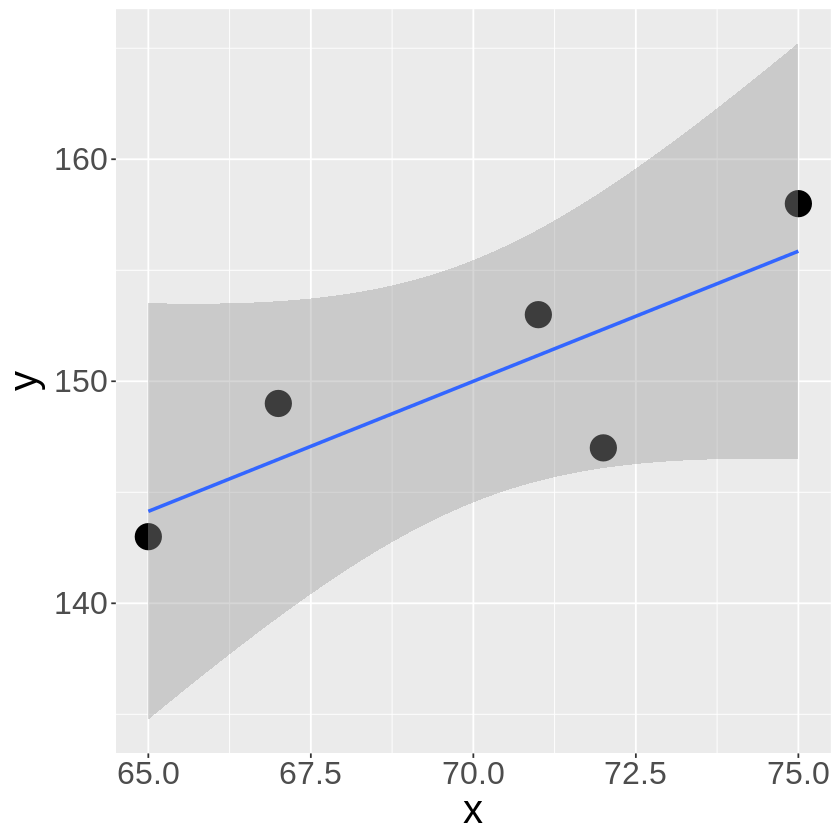

In [ ]:
# geom_smoothにse=TRUEを加えて信頼区間を同時に描く
library(ggplot2)

x <- c(75, 67, 65, 71, 72)
y <- c(158, 149, 143, 153, 147)
data <- data.frame(x=x,y=y)

g <- ggplot(data, aes(x=x, y=y))
g <- g + geom_point(size=7)
g <- g + geom_smooth(method="lm",se=TRUE)
g <- g + theme(text = element_text(size = 24))
g

この信頼区間は母集団における95%信頼区間を示しています。

$\hat{Y_i} = \hat{\beta_1} + \hat{\beta_2}X_i = \bar{Y}+\hat{\beta_2}(X_i - \bar{X})$

として、$\hat{Y_i}$の分散を求めると、

$V(\hat{Y_i}) = V(\bar{Y}) + (X_i - \bar{X})^2V(\hat{\beta_2}) = (\dfrac{1}{n}+\dfrac{(X_i - \bar{X})^2}{\sum (X_i - \bar{X})^2})\sigma^2$

となります。

よって推定値$\hat{Y_i}$は平均$\hat{\beta_1} + \hat{\beta_2}X_i$、分散$(\dfrac{1}{n}+\dfrac{(X_i - \bar{X})^2}{\sum (X_i - \bar{X})^2})\sigma^2$の正規分布に従う。

しかし、$\sigma^2$は未知なので先ほど扱った推定値の標準誤差$s^2 = \sum \hat{e_i}^2 / (n-2)$に置き換えると、

$t$$=\dfrac{\hat{\beta_1} + \hat{\beta_2}X_i - (\beta_1+\beta_2X_i)}{s\sqrt{\dfrac{1}{n}+\dfrac{(X_i - \bar{X})^2}{\sum (X_i - \bar{X})^2}}}$

が自由度$n-2$の$t$分布$t(n-2)$に従うことが分かる。

このことから$\beta_1+\beta_2X_i$の95％信頼区間は、

$[\hat{\beta_1} + \hat{\beta_2}X_i-t_{\alpha/2}(n-2)\times s\sqrt{\dfrac{1}{n}+\dfrac{(X_i - \bar{X})^2}{\sum (X_i - \bar{X})^2}}, \hat{\beta_1} + \hat{\beta_2}X_i+t_{\alpha/2}(n-2)\times s\sqrt{\dfrac{1}{n}+\dfrac{(X_i - \bar{X})^2}{\sum (X_i - \bar{X})^2}}]$

によって求められる。

Rでは、95％信頼区間の具体的な数値は`lm`関数の結果を`predict`関数に適用することで計算できる。





In [ ]:
# predict関数をlm関数の結果に適用して信頼区間を求める
x <- c(75, 67, 65, 71, 72)
y <- c(158, 149, 143, 153, 147)

result <- lm(y~x)

# 各xの観測値における信頼区間
interval_conf_exist <- predict(result, interval = 'confidence', level = 0.95)
interval_conf_exist

# x=65~75における信頼区間
newx <- data.frame(x = seq(65, 75, 1))
interval_conf <- predict(result, newdata = newx, interval = 'confidence', level = 0.95)
interval_conf

,fit,lwr,upr
1,155.8594,146.4811,165.2376
2,146.4844,139.3623,153.6064
3,144.1406,134.7624,153.5189
4,151.1719,145.5054,156.8384
5,152.3438,146.0916,158.5959


,fit,lwr,upr
1,144.1406,134.7624,153.5189
2,145.3125,137.1265,153.4985
3,146.4844,139.3623,153.6064
4,147.6562,141.4041,153.9084
5,148.8281,143.1616,154.4946
6,150.0000,144.5427,155.4573
7,151.1719,145.5054,156.8384
8,152.3438,146.0916,158.5959
9,153.5156,146.3936,160.6377
10,154.6875,146.5015,162.8735


実際に計算された信頼区間を点線で可視化すると、`geom_smooth`関数の範囲と一致しています。

`geom_smooth()` using formula = 'y ~ x'


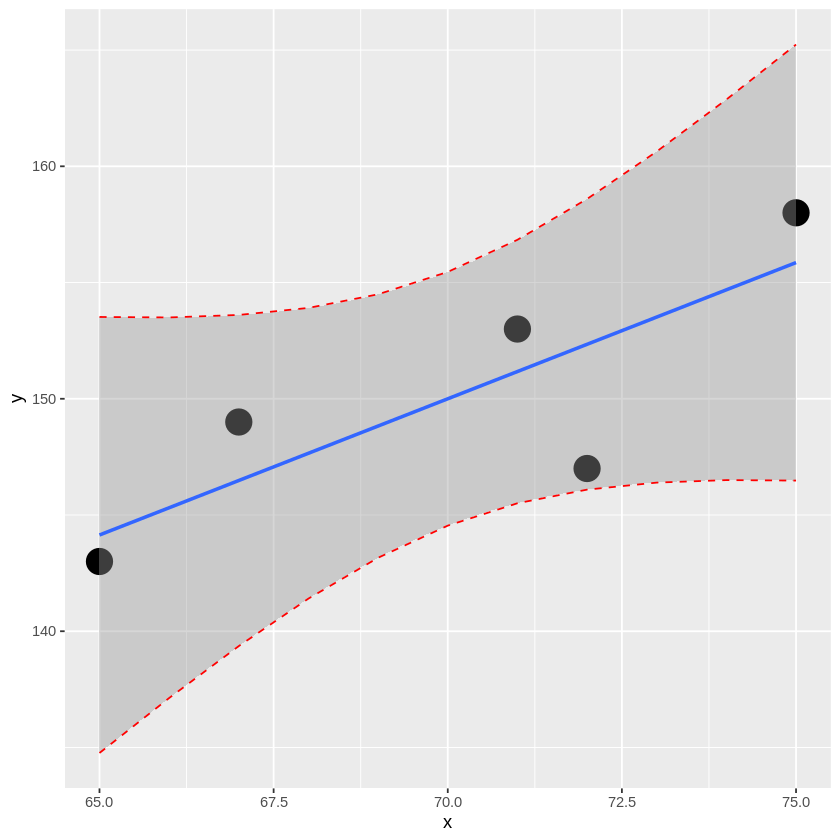

In [ ]:
# 計算された信頼区間と、geom_smooth関数で描かれる信頼区間を比較
library(ggplot2)

x <- c(75, 67, 65, 71, 72)
y <- c(158, 149, 143, 153, 147)
data <- data.frame(x=x,y=y)


result <- lm(y~x)
newx <- data.frame(x = seq(65, 75, 1))
interval_conf <- predict(result, newdata = newx, interval = 'confidence', level = 0.95)

d <- data.frame(x=newx$x,
                y=interval_conf
                )

g <- ggplot(data,aes(x=x, y=y))+
  geom_point(size=7) +
  geom_smooth(method="lm",se=TRUE) +
  geom_line(d,mapping=aes(x=x, y=y.lwr),color="red",linetype=2)+
  geom_line(d,mapping=aes(x=x, y=y.upr),color="red",linetype=2)
plot(g)

回帰分析で得られた回帰式に基づく推定で注意しておくべき点としては、

得られた標本の観測値の範囲外(今回で言うと65~75より外側)でも同じような直線的な関係が続くかは保証できない所にあります。

測定されている$X$の範囲外で$Y$を推定する場合を外挿法と呼び、利用には注意する必要があります。

# 重回帰分析

ここまで扱ってきた回帰分析では、説明変数がたった1つしかない場合でした。

この様な場合を**単回帰分析**と呼びます。

しかし、多くの場合、複数の変数が従属変数に影響を与えていることが考えられます。

例えば植物の収穫量には、草丈だけではなく、施肥量や日長、日照時間など、様々なものが説明変数として考えられます。

この様な2つ以上の説明変数を考えた場合の回帰分析を**重回帰分析**と呼びます。

重回帰分析における重回帰方程式は、母集団において

$Y_i = \beta_1 + \beta_2X_{2i} + \beta_3X_{3i} + \cdots + \beta_kX_{ki} + \epsilon_i$

と表現出来ます。

$X_2 ... X_k$は説明変数、$\epsilon$は誤差項、$\beta_1, \beta_2, ... \beta_k$は、他の説明変数の影響を省いた各説明変数の影響を表しています。

重回帰方程式には$k$個の母偏回帰係数$\beta_1, \beta_2, ... \beta_k$があり、その推定は単回帰分析と同様に最小二乗法が用いられます。

誤差項$\epsilon_i = Y_i - (\beta_1 + \beta_2X_{2i} + \beta_3X_{3i} + \cdots + \beta_kX_{ki})$

の平方和$S = \sum\epsilon_i^2$を最小にする偏回帰係数を考える形です。

$S$を最小にする$\beta_1, \beta_2, ... \beta_k$は、それぞれの偏微分を$0$とした連立方程式

$\dfrac{\partial S}{\partial \beta_1} = 0$, $\dfrac{\partial S}{\partial \beta_2} = 0$, ... $\dfrac{\partial S}{\partial \beta_k} = 0$

を解くことで求まります。この解が標本偏回帰係数$\hat{\beta_1}, \hat{\beta_2}, \hat{\beta_3}, ... \hat{\beta_k}$となります。






また、この解から得られた

$Y = \hat{\beta_1} + \hat{\beta_2}X_2 + \hat{\beta_3}X_3 + \cdots + \hat{\beta_k}X_k$

を**標本重回帰方程式**と呼びます。

$Y_i$の推定値は$\hat{Y_i} = \hat{\beta_1} + \hat{\beta_2}X_{2i} + \hat{\beta_3}X_{3i} + \cdots + \hat{\beta_k}X_{ki}$で推定されます。

単回帰分析同様に、$Y_i$の総変動$\sum (Y_i - \bar{Y})^2$は重回帰方程式によって説明できる変動$\sum (\hat{Y_i} - \bar{Y})^2$と誤差変動$\sum \hat{e_i}^2$の和で表す事が出来ます。

$\sum (Y_i - \bar{Y})^2 = \sum (\hat{Y_i} - \bar{Y})^2 + \sum \hat{e_i}^2$

**決定係数**$R^2$は

$R^2 = \dfrac{\sum (\hat{Y_i} - \bar{Y})^2}{\sum (Y_i - \bar{Y})^2} = 1 - \dfrac{\sum \hat{e_i}^2}{\sum (Y_i - \bar{Y})^2}$

で計算できます。

決定係数の平方根$R$を**重相関係数**と呼びます。

### 重回帰分析における偏回帰係数の検定

重回帰分析でも単回帰分析同様に各偏回帰係数の有意性を検定できます。

具体的には、$t_i = \dfrac{\hat{\beta_i}-\beta_i}{s.e.(\hat{\beta_i})}$が自由度$n-k$の$t$分布$t(n-k)$に従うことを利用します。(導出は省略)

よって、ある１つの回帰係数について、

帰無仮説$H_0: \beta_i = a$の検定は単回帰分析と同じように実施できます。

重回帰分析の場合、説明変数が複数あるので、同時に複数の偏回帰係数を検定することも出来ます。

帰無仮説$H_0: \beta_2 = 0 かつ \beta_3 = 0$

対立仮説$H_1: \beta_2 \ne 0または \beta_3 \ne 0$

のような形です。

この場合は回帰係数ごとに$t$検定をやるのでは不十分なので、

$H_0$が正しい場合の重回帰方程式$Y_i = \beta_1 + \beta_4X_{4i} + ... + \beta_kX_{ki}$と

全ての説明変数を含む重回帰方程式$Y_i = \beta_1 + \beta_2X_{2i} + ... + \beta_kX_{ki}$、

それぞれから求めた残差の平方和$\sum \hat{e_i}^2$を$S_0, S_1$とすると、

統計量$F = \dfrac{(S_0 - S_1)/p}{S_1/(n-k)}$

は帰無仮説の下で、自由度$(p, n-k)$の$F$分布$F(p, n-k)$に従うことを利用します。

特に、すべての説明変数$X_2, X_3, ... X_k$が従属変数$Y$を説明しないという

帰無仮説$H_0: \beta_2 = \beta_3 = \cdots = \beta_k = 0$

対立仮説$H_1: \beta_2, \beta_3, \cdots \beta_k $の少なくとも1つは$0$ではない

これらの仮説に基づいて検定する場合は、重回帰方程式の妥当性の検定が出来ます。


## Rによる重回帰分析の実施

単回帰分析同様、重回帰分析もRで簡単に実施する事が出来ます。

下表の様なデータが得られたとき、収穫量を草丈・施肥量・葉身幅から推定するために

$\hat{Y_i} = \hat{\beta_1} + \hat{\beta_2}X_{2i} + \hat{\beta_3}X_{3i} + \hat{\beta_4}X_{4i}$

という重回帰方程式を考えます。

草丈($X_2$)、施肥量($X_3$)、葉身幅($X_4$)を表しています。

\begin{array}{ccccc}  \hline
 個体 & 収穫量 & 草丈 & 施肥量 & 葉身幅 \\ \hline
 1 & 75 & 158 & 100 & 1.5 \\
 2 & 67 & 149 & 80 & 1.4 \\
 3 & 65 & 143 & 90 & 1.4 \\
 4 & 71 & 153 & 100 & 1.5 \\
 5 & 78 & 153 & 100 & 1.6 \\
 6 & 60 & 140 & 90 & 1.4 \\
 7 & 57 & 133 & 80 & 1.4 \\
 8 & 72 & 152 & 90 & 1.6 \\ \hline
\end{array}

重回帰分析はRの`lm`関数で実施でき、データフレームの列名を使用して

```
result <- lm(従属変数の列名 ~ 説明変数1の列名 + 説明変数2の列名 + ... + 説明変数kの列名, data=データフレーム名)
summary(result)
```

と実施できます。

In [ ]:
# lm関数を使用して重回帰分析を行う
y <- c(75, 67, 65, 71, 78, 60, 57, 72)
x2 <- c(158, 149, 143, 153, 153, 140, 133, 152)
x3 <- c(100, 80, 90, 100, 100, 90, 80, 90)
x4 <- c(1.5, 1.4, 1.4, 1.5, 1.6, 1.4, 1.4, 1.6)
df <- data.frame(Yield=y, Height=x2, Fertilizer=x3, Leafwidth=x4)

result <- lm(Yield~Height+Fertilizer+Leafwidth, data=df)
summary(result)


Call:
lm(formula = Yield ~ Height + Fertilizer + Leafwidth, data = df)

Residuals:
       1        2        3        4        5        6        7        8 
-0.37609  0.87402  1.62720 -1.49850  2.83092 -1.64625  0.08231 -1.89363 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -62.61385   16.38883  -3.821   0.0188 *
Height        0.57552    0.16190   3.555   0.0237 *
Fertilizer    0.06999    0.15010   0.466   0.6653  
Leafwidth    26.70583   13.66566   1.954   0.1224  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.243 on 4 degrees of freedom
Multiple R-squared:  0.9455,	Adjusted R-squared:  0.9046 
F-statistic: 23.12 on 3 and 4 DF,  p-value: 0.005473


単回帰分析と同じように各偏回帰係数の検定結果や決定係数等を計算して出力してくれます。

ここで、決定係数(Multiple R-squared)とは別で、**自由度調整済み決定係数**(Adjusted R-squared)とよ呼ばれる値も計算されています。

通常の決定係数が偏差平方和から計算されるのに対し、自由度調整済みの決定係数は平均平方を用いて計算される値になります。

自由度調整済み決定係数$R_f = \dfrac{\sum (y_i - \hat{y_i})^2/(n-k-1)}{\sum (y_i - \bar{y})^2/(n-1)}$

決定係数は(全然関係無いものであっても)説明変数の数が増えるほど1に近づくという性質を持っているので、説明変数の数が異なる回帰モデルどうしを比較する場合には、変数の数が考慮された自由度調整済み決定係数を使います。


#### (参考) 行列計算による偏回帰係数の算出

標本偏回帰係数は**行列計算**によって求めることもできます。

観測値$Y_1, Y_2, ..., Y_n$が得られたとき、

\begin{equation}
  \begin{pmatrix}
    Y_{1}  \\
    Y_{2}  \\
    \vdots  \\
    Y_{n}
  \end{pmatrix}
  =
  \begin{pmatrix}
    1 & X_{11} & \dots  & X_{1k} \\
    1 & X_{21} & \dots  & X_{2k} \\
    \vdots & \vdots & \ddots & \vdots \\
    1 & X_{n1} & \dots  & X_{nk}
  \end{pmatrix}
  \begin{pmatrix}
    \beta_{1}  \\
    \beta_{2}  \\
    \vdots  \\
    \beta_{k}
  \end{pmatrix}
  +
  \begin{pmatrix}
    \epsilon_{1}  \\
    \epsilon_{2}  \\
    \vdots  \\
    \epsilon_{n}
  \end{pmatrix}
\end{equation}

といった形で行列とベクトルを用いて$\mathbf{Y}=\mathbf{X}\boldsymbol{\beta}+\boldsymbol{\epsilon}$と表す事が出来ます。

誤差ベクトルの平方和$\boldsymbol{\epsilon}'\boldsymbol{\epsilon}$を最小にするには、

$||\boldsymbol{X\beta-Y}||^2$を最小にすることになるので、

$||\boldsymbol{X\beta-Y}||^2 = \boldsymbol{(X\beta-Y)'(X\beta-Y)} = \boldsymbol{(\beta'X'-Y')(X\beta-Y)} = \boldsymbol{\beta'X'X\beta-2\beta'X'Y+Y'Y}$

この式を$\boldsymbol{\beta}$で微分して0と置いた式を解く。

微分すると$\boldsymbol{2X'X \beta-2X'Y}$となるので、整理すると$\boldsymbol{X'X \beta = X'Y}$となる。

ここで、$\boldsymbol{X'X}$の逆行列$\boldsymbol{(X'X)^{-1}}$が存在すれば、

$\boldsymbol{\hat{\beta} = (X'X)^{-1}X'Y}$から標本偏回帰係数を算出できます。

本講義ではRでの行列計算についてはあまり触れていませんが、

`t(X)`で行列の転置、`solve(X)`で逆行列の計算、`X %*% Y`で行列XとYの積が求まります。

実際に先ほどのデータで計算してみると…

In [ ]:
# 行列計算で偏回帰係数を求める
y <- c(75, 67, 65, 71, 78, 60, 57, 72)
x2 <- c(158, 149, 143, 153, 153, 140, 133, 152)
x3 <- c(100, 80, 90, 100, 100, 90, 80, 90)
x4 <- c(1.5, 1.4, 1.4, 1.5, 1.6, 1.4, 1.4, 1.6)

X <- matrix(c(rep(1, 8), x2, x3, x4), ncol=4)
solve(t(X) %*% X) %*% t(X) %*% y

-62.61384868
0.57551822
0.06999318
26.70582575


### 多重共線性

重回帰分析を実施する際に、説明変数間に非常に高い相関関係がある場合、**多重共線性**の問題が生じる場合があります。

極端な例ですが、先ほどのデータに施肥量Bという施肥量Aとほとんど同じ(相関が非常に強い)説明変数があったとします。

\begin{array}{ccccc}  \hline
 個体 & 収穫量 & 草丈 & 施肥量A & 施肥量B & 葉身幅 \\ \hline
 1 & 75 & 158 & 100 & 100 & 1.5 \\
 2 & 67 & 149 & 80 & 80 & 1.4 \\
 3 & 65 & 143 & 90 & 90 & 1.4 \\
 4 & 71 & 153 & 100 & 100 & 1.5 \\
 5 & 78 & 153 & 100 & 100 & 1.6 \\
 6 & 60 & 140 & 90 & 90 & 1.4 \\
 7 & 57 & 133 & 80 & 80 & 1.4 \\
 8 & 72 & 152 & 90 & 89.999 & 1.6 \\ \hline
\end{array}

このデータを用いて重回帰分析を行うと

In [ ]:
# 多重共線性が生じた場合
y <- c(75, 67, 65, 71, 78, 60, 57, 72)
x2 <- c(158, 149, 143, 153, 153, 140, 133, 152)
x3 <- c(100, 80, 90, 100, 100, 90, 80, 90)
x4 <- c(100, 80, 90, 100, 100, 90, 80, 89.999)
x5 <- c(1.5, 1.4, 1.4, 1.5, 1.6, 1.4, 1.4, 1.6)
df <- data.frame(Yield=y, Height=x2, Fertilizer=x3, FertilizerB=x4, Leafwidth=x5)

result <- lm(Yield~Height+Fertilizer+FertilizerB+Leafwidth, data=df)
summary(result)


Call:
lm(formula = Yield ~ Height + Fertilizer + FertilizerB + Leafwidth, 
    data = df)

Residuals:
         1          2          3          4          5          6          7 
-2.550e-01 -7.594e-02  2.415e+00 -1.330e+00  7.926e-01 -8.300e-01 -7.167e-01 
         8 
 2.981e-12 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)   -80.5121    16.2739  -4.947   0.0158 *
Height          0.5850     0.1286   4.548   0.0199 *
Fertilizer  -5603.9187  3061.9518  -1.830   0.1646  
FertilizerB  5603.8206  3061.8600   1.830   0.1646  
Leafwidth      48.7720    16.2175   3.007   0.0573 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.78 on 3 degrees of freedom
Multiple R-squared:  0.9742,	Adjusted R-squared:  0.9399 
F-statistic: 28.36 on 4 and 3 DF,  p-value: 0.01018


このように、多重共線性が生じると、施肥量の$\hat{\beta}$の推定値が極端な値になってしまうことが分かります。

この様な場合を避けるために、相関の強い説明変数が混じっていた場合には、どちらか一方のみを採用する等する必要があります。

特に遺伝子型データは連鎖の影響から多重共線性が非常に発生しやすいデータとして有名です。

# 相関・因果関係・擬似相関

相関と回帰はいずれも2つの変数の関係を示す統計量でしたが、

その関係性には相関関係・因果関係・擬似相関という3つのパターンがあります。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter8/soukan.png?raw=true" alt="title" height="150px">

* 相関関係は2変数の間に方向性が無いパターン
* 因果関係は片方の変数がもう片方に影響を与えるパターン
* 擬似相関は第3の因子により2変数に関連が生じているパターン

2変数のデータがあれば相関係数や回帰係数が算出できますが、それがどの様な関係性によって生じているのかは注意が必要です。

ただ「相関がある」という結果から「因果関係がある」と断定することは通常難しく、

また、一見因果関係がありそうでも、擬似相関による場合なども含まれています。

例えば回帰分析によって「草丈が伸びれば収穫量が増える」という結果が分かったとしても、草丈が原因となって収穫量が増えたとは限りません。

第3の要因(施肥量・品種の特性など)によって植物体が大きくなった結果、草丈・収穫量の両者が伸び、その間に擬似的な相関が生じたという可能性も十分あります。

よって2変数の関係性について、結果を述べる際には表現に注意する必要があります。
